In [18]:
pip install crewai langchain-groq langchain-community langchain-pinecone pinecone-client huggingface-hub

In [19]:
import os
from crewai import Agent, Task, Crew
from langchain_groq import ChatGroq
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_pinecone import PineconeVectorStore
from pinecone import Pinecone as PineconeClient

In [ ]:

# Set API keys
os.environ["GROQ_API_KEY"] = "api pls :)"  # Replace with your Groq API key
os.environ["PINECONE_API_KEY"] = "Your api pls ;)"  # Replace with your Pinecone API key


In [21]:
# Initialize Pinecone
pc = PineconeClient(api_key=os.environ["PINECONE_API_KEY"])
index_name = "crewai-memory"
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1")
    )
index = pc.Index(index_name)

In [22]:
# Initialize embeddings (no Hugging Face API key needed)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [23]:
# Initialize Groq LLM (LLaMA 3.1 70B)
llm = ChatGroq(model="groq/llama3-70b-8192", api_key=os.environ["GROQ_API_KEY"])

In [17]:
# Initialize Pinecone vector store for memory
memory_store = PineconeVectorStore(index_name=index_name, embedding=embeddings, pinecone_api_key=os.environ["PINECONE_API_KEY"], text_key="text")

In [35]:
# Define support agent
support_agent = Agent(
    role="Customer Support",
    goal="Resolve customer inquiries efficiently",
    backstory="Expert in e-commerce queries with 5 years of experience",
    memory=True,
    max_rpm=100,
    llm=llm
)

In [36]:
# Define task
task = Task(
    description="Answer a customer query about a delayed shipment: 'My order #12345 is delayed. Where is it ?'",
    expected_output="A polite, accurate response addressing the delay and providing an estimated delivery date",
    agent=support_agent
)


In [37]:
# Create and execute crew with Pinecone memory
crew = Crew(
    agents=[support_agent],
    tasks=[task],
    memory=True,
    embedder={"provider": "huggingface", "config": {"model": "sentence-transformers/all-MiniLM-L6-v2"}},
    vector_store=memory_store
)
result = crew.kickoff()

ERROR:root:Error during short_term search: Request URL is missing an 'http://' or 'https://' protocol. in query.
ERROR:root:Error during entities search: Request URL is missing an 'http://' or 'https://' protocol. in query.
ERROR:root:Error during short_term save: Request URL is missing an 'http://' or 'https://' protocol. in add.
ERROR:root:Error during entities save: Request URL is missing an 'http://' or 'https://' protocol. in add.
ERROR:root:Error during entities save: Request URL is missing an 'http://' or 'https://' protocol. in add.
ERROR:root:Error during entities save: Request URL is missing an 'http://' or 'https://' protocol. in add.


In [38]:
print("Response:", result)

Response: Hi Talha,

I'm so sorry to hear that your shipment has been delayed. I understand how frustrating it can be to wait for your order, and I'm here to help.

Firstly, I want to assure you that we're doing everything in our power to get your order to you as soon as possible. Our estimated delivery date for your order is now [insert estimated delivery date]. You can be sure that we're working hard to get it to you by then.

In the meantime, I'd like to offer you a gesture of goodwill for the inconvenience caused. We value your patience and loyalty, and we want to make things right. If there's anything else we can do to make up for the delay, please don't hesitate to let us know.

If you have any further questions or concerns, please don't hesitate to reach out to me directly. You can reply to this email, or give me a call at [insert direct contact number]. I'll be more than happy to assist you in any way I can.

Once again, I apologize for the delay and appreciate your understandi

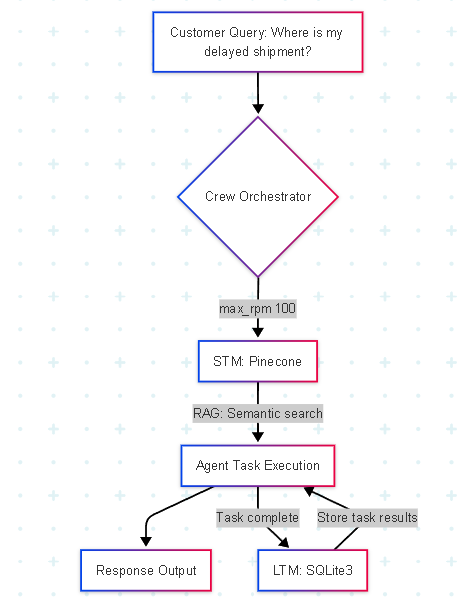